In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r"C:\Users\Roahan Roy\Desktop\Data Science Projects\Data\GiveMeSomeCredit\cs-training.csv").drop(['Unnamed: 0'],axis=1)
test = pd.read_csv(r"C:\Users\Roahan Roy\Desktop\Data Science Projects\Data\GiveMeSomeCredit\cs-test.csv").drop(['Unnamed: 0'],axis=1)

In [3]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
#Finding Duplicates
train.duplicated().value_counts()

False    149391
True        609
Name: count, dtype: int64

In [5]:
#Removing Duplicates
train_reduced = train.drop_duplicates()

In [6]:
train_reduced.shape

(149391, 11)

In [7]:
train.shape

(150000, 11)

In [8]:
test.shape

(101503, 11)

In [9]:
#Percentage of Null values found
def find_missing(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [10]:
find_missing(train_reduced)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [11]:
#Filtering rows having missing values
train_reduced[train_reduced['NumberOfDependents'].isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,0.0,3828.000000,3828.000000,3828.000000,3828.000000,0.0
mean,0.046499,11.003369,59.741641,0.572623,1110.713689,NaN,5.708986,0.497126,0.605799,0.474138,NaN
std,0.210592,240.656436,18.345175,6.527320,4235.410634,NaN,4.086337,6.523199,0.920990,6.520343,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.009228,48.000000,0.000000,25.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047670,61.000000,0.000000,398.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.259028,74.000000,0.000000,1587.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [12]:
train_reduced['NumberOfDependents'].agg(['mode'])
# Maximum people (86392) have 0 dependents

,mode
0,0.0


In [13]:
train_reduced.groupby(['NumberOfDependents']).size()
#Maximum people (86392) have 0 dependents

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [14]:
#Creating new dataframes having missing and 
df_miss = train_reduced[train_reduced['NumberOfDependents'].isnull()]
df_not_miss = train_reduced[train_reduced['NumberOfDependents'].notnull()]

In [15]:
df_miss.shape

(3828, 11)

In [16]:
df_not_miss.shape

(145563, 11)

In [17]:
df_miss[['NumberOfDependents', 'MonthlyIncome']] = df_miss[['NumberOfDependents', 'MonthlyIncome']].fillna(0)

C:\Users\Roahan Roy\AppData\Local\Temp\ipykernel_12608\2542981488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miss[['NumberOfDependents', 'MonthlyIncome']] = df_miss[['NumberOfDependents', 'MonthlyIncome']].fillna(0)


In [18]:
find_missing(df_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [19]:
find_missing(df_not_miss) #Still missing values in 'MonthlyIncome'

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [20]:
df_not_miss['MonthlyIncome'].agg(['mean','median','min'])

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [21]:
# Filled median value in NA values of monthly income
df_not_miss['MonthlyIncome'] = df_not_miss['MonthlyIncome'].fillna(df_not_miss['MonthlyIncome'].median())

C:\Users\Roahan Roy\AppData\Local\Temp\ipykernel_12608\3027744779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_miss['MonthlyIncome'] = df_not_miss['MonthlyIncome'].fillna(df_not_miss['MonthlyIncome'].median())


In [22]:
#Concatenating the 2 dataframes
final_train = pd.concat([df_not_miss, df_miss])

In [23]:
final_train.shape # which matches the train_reduced shape made after removing duplicates

(149391, 11)

In [24]:
find_missing(final_train) # no missing values

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [25]:
final_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [26]:
#Percentage of Non-defaulters (0) and Defaulters(1)
final_train.groupby(['SeriousDlqin2yrs']).size()/final_train.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

##### The above data is highly unbalanced and will show biasness towards non-defaulters as they are ~93%

#### We have to see and evaluate the data to figure out which rows/columns are unnecessary for our model

In [27]:
final_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [28]:
final_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99]) #We can see outliers

0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [29]:
(final_train[final_train['RevolvingUtilizationOfUnsecuredLines'] > 10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


#### We cannot remove data which has many defaulters  like in [final_train['RevolvingUtilizationOfUnsecuredLines'] > 1]. Therefore we choose 10 as then there are only ~7% defaulters from total count of 241

In [30]:
util_dropped = final_train.drop(final_train[final_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

In [31]:
util_dropped.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


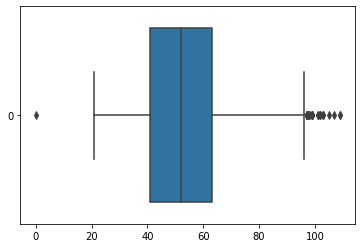

In [32]:
sns.boxplot(util_dropped['age'], orient="h")
plt.show() #Only one age 0 which we can remove or leave as it is. Should not make much difference in our model.

In [33]:
util_dropped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [34]:
util_dropped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [35]:
util_dropped.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [36]:
util_dropped[util_dropped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [37]:
#Winsorization is needed to  get the 96 value close to 17

In [38]:
util_dropped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: xlabel='DebtRatio', ylabel='Density'>

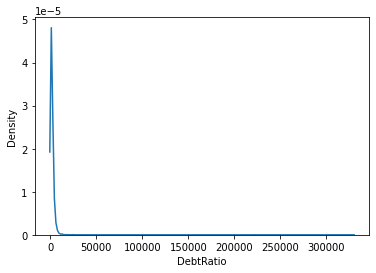

In [39]:
sns.kdeplot(util_dropped['DebtRatio'])

In [40]:
util_dropped['DebtRatio'].quantile([.975])

0.975    3492.0
Name: DebtRatio, dtype: float64

In [41]:
util_dropped[util_dropped['DebtRatio']>3492][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3727.000000,3727.000000
mean,0.064395,4798.715321
std,0.245488,1698.867567
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In [42]:
temp_df = util_dropped[(util_dropped['DebtRatio']>3492) & (util_dropped['SeriousDlqin2yrs']==util_dropped['MonthlyIncome'])]

In [43]:
train_df = util_dropped.drop(util_dropped[(util_dropped['DebtRatio']>3492) & (util_dropped['SeriousDlqin2yrs']==util_dropped['MonthlyIncome'])].index)

In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
model = XGBClassifier(tree_method = 'exact')

In [46]:
x = train_df.drop(['SeriousDlqin2yrs'],axis=1)
y = train_df['SeriousDlqin2yrs']

In [48]:
model.fit(x,y.values.ravel())
y_pred = model.predict(x)

In [49]:
accuracy_score(y,y_pred)

0.947139169713917

In [50]:
cm = confusion_matrix(y,y_pred)

Text(33.0, 0.5, 'actuals')

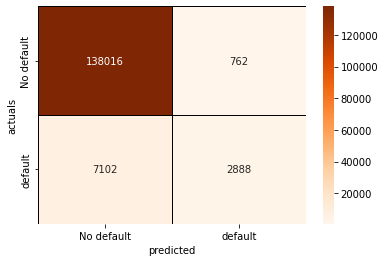

In [52]:
# Confusion Matrix

sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No default','default'])
plt.yticks(np.arange(2)+.5,['No default','default'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [53]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138778
           1       0.79      0.29      0.42      9990

    accuracy                           0.95    148768
   macro avg       0.87      0.64      0.70    148768
weighted avg       0.94      0.95      0.94    148768

